In [16]:
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag
import numpy as np
import matplotlib.pyplot as plt
import math

We know that 
$$\tau = { {1\over C}} \exp {  {Kv}\over {kT} }$$

Rearranging and taking the log of both sides, we get
$$
\hbox{ln }( \tau  C )= { {K {4} \pi r^3}\over {3kT} }.
$$
Solving for $r^3$ gives
$$
r^3 =   {3\over 4} { {kT}\over { K\pi} }ln \tau C.
$$

We  set $k= 1.38 \times 10^{-23}$J/K (Boltzmann's constant), $T=300$K (room temperature),  $C=10^{10}$s, and $K=1.3 \times 10^4$J/m$^3$ (the anisotropy constant for magnetite). Knowing that $d=2r$, we can write the script: 

In [176]:
k=1.38e-23 # Boltzmann's constant
T=300 # room T
C=1e10 # frequency factor
K=1.3e4 # anisotropy constant for magnetite
taus=[.1,10,1e2,1e3,1e5,1e9,1e15,1e24]
print (' tau (s)  d (microns)')
for tau in taus:
    r3=((3./4.)*(k*T/(K*np.pi)))*np.log(tau*C) # equation relating r^3 to tau above. 
    r=r3**(1./3.) # take the cube root
    print ('%8.0e'%(tau), '  %5.3f'%(2*r*1e6)) # print tau (seconds) and d (in microns)

 tau (s)  d (microns)
   1e-01   0.023
   1e+01   0.025
   1e+02   0.026
   1e+03   0.026
   1e+05   0.028
   1e+09   0.030
   1e+15   0.033
   1e+24   0.036


In [177]:
def diameter_given_relaxation_time(tau, T, K, k, C):
    r3 = ((3./4.)*(k*T/(K*np.pi)))*np.log(tau*C) # equation relating r^3 to tau above. 
    r = r3**(1./3.) # take the cube root
    return r*2*1E9

In [178]:
diameter_list = []

for tau in taus:
    diameter = diameter_given_relaxation_time(tau, T, K, k, C)
    diameter_list.append(diameter)

In [179]:
diameter_list

[23.27227578834705,
 24.882207842751278,
 25.614453856444598,
 26.30706931947468,
 27.592333977272606,
 29.854459899613133,
 32.714329326338195,
 36.24524091336682]

Text(0, 0.5, 'relaxation time (s)')

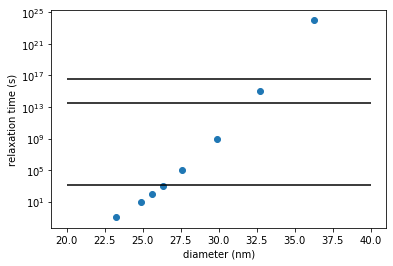

In [183]:
plt.scatter(diameter_list,taus)
plt.yscale('log')
plt.hlines(60*20,20,40,label='20 minutes')
plt.hlines(60*60*24*365*1e6,20,40,label='1 million years')
plt.hlines(60*60*24*365*1e9,20,40,label='1 billion years')
plt
plt.xlabel('diameter (nm)')
plt.ylabel('relaxation time (s)')